In [1]:
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from glob import glob

#From Local
from nircam_to_fgs import *
from FGS_commissioning import *
import utils

%matplotlib inline

## Convert NIRCAM images to FGS images: nircam_to_fgs.py

Running nircam_to_fgs.py will create an ‘out’ directory (whether you want it to or not) in the directory where you are running this script. Inside the 'out' directory will be directories for every image that you run the script for with different forms of files with coordinate/countrate information and a png with the bin_norm_img with the center of each PSF marked in blue. 


In [2]:
local_path = '/Users/kbrooks/git_repos/Commissioning-tools/'

In [3]:
# Your input can be the path to a single image, a directory (where all the fits files exist), or a list of paths
input_dir = '/user/kbrooks/itar/FGS/ga/ga0617/'
input_im = '/user/kbrooks/itar/FGS/ga/ga0617/GA5.fits'
input_list = glob('/user/kbrooks/itar/FGS/ga/ga0617/*.fits')

In [4]:
root = os.path.basename(input_im).split('.')[0]

In [5]:
guider = 2
jmag = 11.5
#fgs_counts = 2*10**6

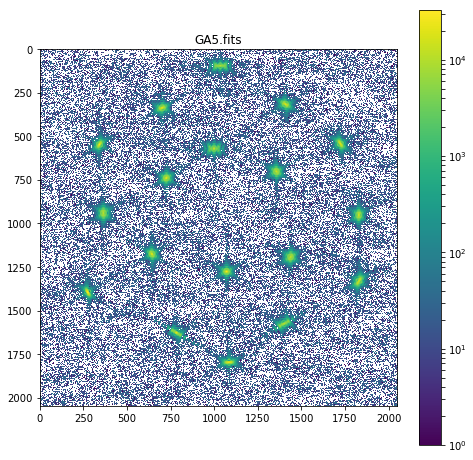

In [6]:
header_in, data_in = utils.read_fits(input_im)

plt.figure(figsize=(8,8))
plt.imshow(data_in, norm=LogNorm())
plt.colorbar()
plt.title(os.path.basename(input_im))
plt.show()

In [7]:
# nircam_mod tells you which detector is being used to apply the appropriate flip. This does not need to be set if the 
# header can be parsed

convert_im(input_im, guider, fgs_counts=None, jmag=jmag, nircam_mod=None)

J magnitude = 11.5
Beginning to create FGS image from GA5
Successfully wrote: /Users/kbrooks/git_repos/Commissioning-tools/out/GA5/FGS_imgs/GA5_G2_binned_pad_norm.fits
Finished for GA5, Guider = 2


In [8]:
output_im = os.path.join(local_path,'out',root,'FGS_imgs/{}_G{}_binned_pad_norm.fits'.format(root,guider))
header_out, data_out = utils.read_fits(output_im,0)

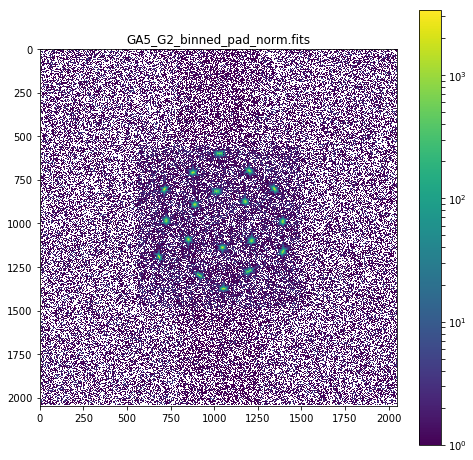

In [9]:
plt.figure(figsize=(8,8))
plt.imshow(data_out, norm=LogNorm())
plt.colorbar()
plt.title(os.path.basename(output_im))
plt.show()

## Run the Commissioning Tool

In [10]:
im = os.path.join(local_path,'out',root,'FGS_imgs/{}_G{}_binned_pad_norm.fits'.format(root, guider))

run_ALL(im, guider, root, num_frames=5000)


Max of input image: 3374
Coordinates of Guide Star: x=912.3117, y=1299.5557
ID
baseline 1140.412
Successfully wrote: /Users/kbrooks/git_repos/Commissioning-tools/out/GA5/dhas_files/GA5_G2_IDsky.fits
Successfully wrote: /Users/kbrooks/git_repos/Commissioning-tools/out/GA5/dhas_files/GA5_G2_ID.stc
Successfully wrote: /Users/kbrooks/git_repos/Commissioning-tools/out/GA5/dhas_files/GA5_G2_IDbias.fits
Successfully wrote: /Users/kbrooks/git_repos/Commissioning-tools/out/GA5/dhas_files/GA5_G2_IDcds.fits
Successfully wrote: /Users/kbrooks/git_repos/Commissioning-tools/out/GA5/dhas_files/GA5_G2_ID.gssscat
Successfully wrote: /Users/kbrooks/git_repos/Commissioning-tools/out/GA5/dhas_files/GA5_G2_IDff.fits
Successfully wrote: /Users/kbrooks/git_repos/Commissioning-tools/out/GA5/dhas_files/GA5_G2_IDstrips.fits
Successfully wrote: GA5_G2_ID.prc
Max of input image: 3374
Coordinates of Guide Star: x=912.3117, y=1299.5557
ACQ
baseline 748.7676
Successfully wrote: /Users/kbrooks/git_repos/Commissioning